<a href="https://colab.research.google.com/github/Srijan-CdGd/Eye_detectionn_DL_model/blob/main/resnet50_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data_train = tf.keras.utils.image_dataset_from_directory(r'/content/drive/MyDrive/dataset/Dataset for Train test/train', batch_size=4, image_size=(128,128))

data_test = tf.keras.utils.image_dataset_from_directory(r'/content/drive/MyDrive/dataset/Dataset for Train test/test', batch_size= 4, image_size=(128,128))

Found 1234 files belonging to 2 classes.
Found 218 files belonging to 2 classes.


In [4]:
type(data_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [5]:
data_train_iterator = data_train.as_numpy_iterator()
data_test_iterator = data_test.as_numpy_iterator()

In [6]:
batch = data_train_iterator.next()

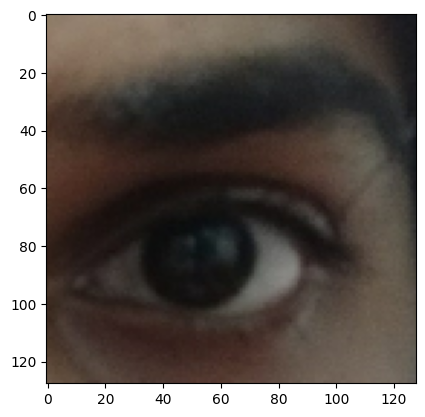

In [7]:
batch[0][1]
plt.imshow(batch[0][3].astype(int))
plt.show()

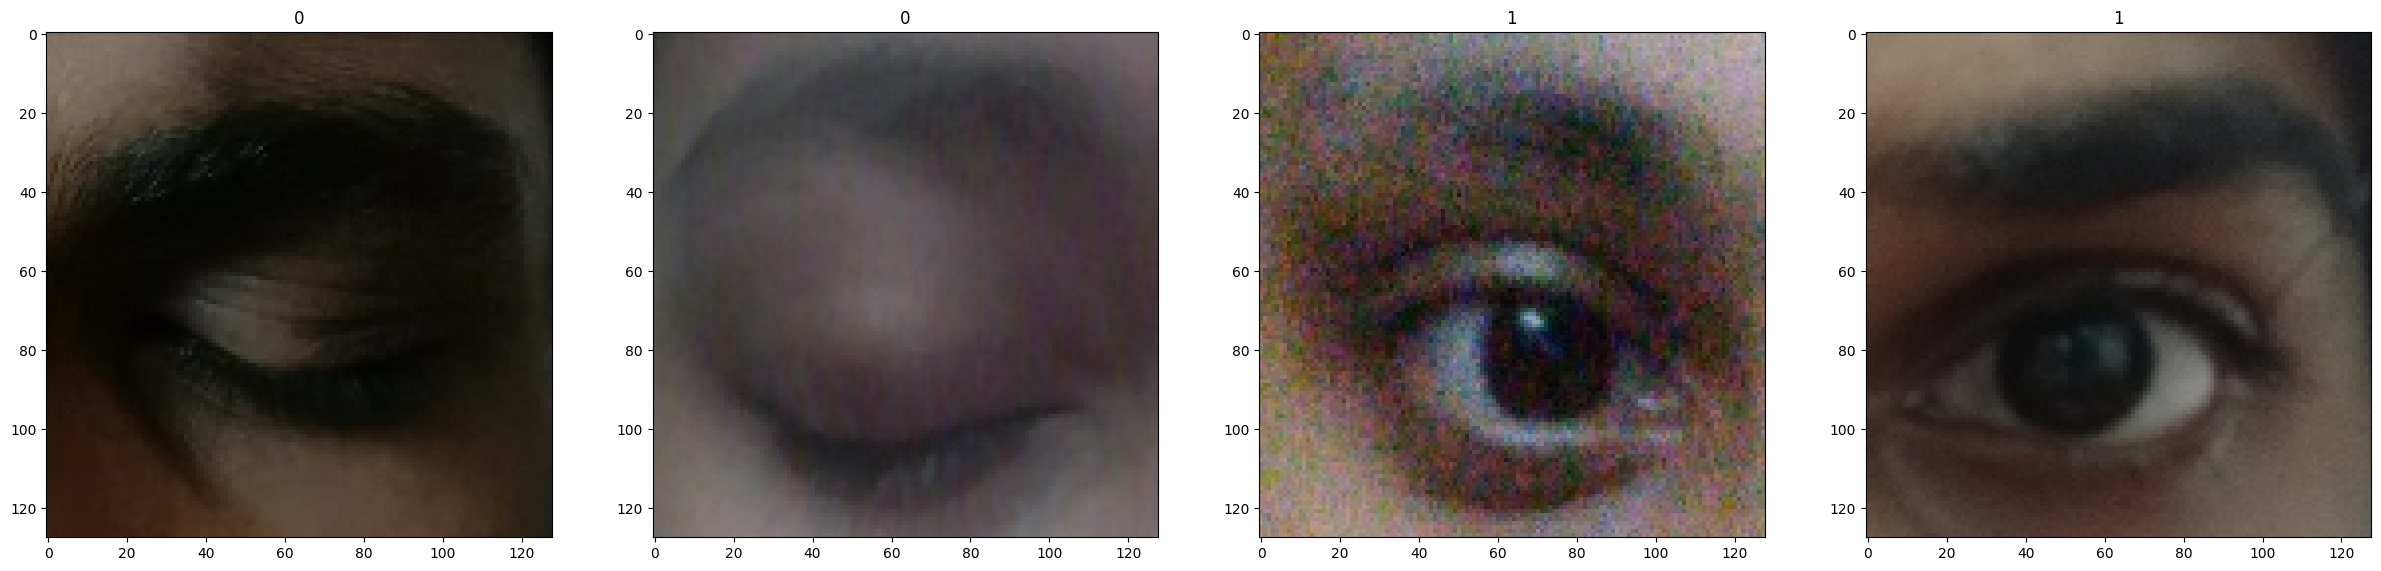

In [8]:
fig, ax = plt.subplots(ncols = 4, figsize = (30,30))
for idx, img in enumerate(batch[0]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
train_size = int(len(data_train)*.8)
val_size = int(len(data_train)*.2)+1
print(train_size)
print(val_size)
print(len(data_train))
print(train_size + val_size)

247
62
309
309


In [10]:
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)
test = data_test.take(len(data_test))

In [11]:
resnet_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', classes = 2, input_shape = (128,128,3))
resnet_model.trainable = False
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [12]:
model = Sequential([
    resnet_model,
    Flatten()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 40,431,362
Trainable params: 16,843,650
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
img = cv2.imread("/content/drive/MyDrive/dataset/Dataset for Train test/train/Closed/_0.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128, 128))
img=img/255

In [15]:
print(img.shape)
model.predict(np.array([img]))

(128, 128, 3)
1/1 [==============================] - 10s 10s/step


array([[0.4870315, 0.6313992]], dtype=float32)

In [16]:
from tensorflow.keras.optimizers import Adamax

model.compile(Adamax(learning_rate= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 40,431,362
Trainable params: 16,843,650
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
history = model.fit(x = train, validation_data = val, epochs = 20, verbose = 1, shuffle = True)

Epoch 1/20
247/247 [==============================] - 18s 46ms/step - loss: 0.6465 - accuracy: 0.9666 - val_loss: 0.1230 - val_accuracy: 0.9878
Epoch 2/20
247/247 [==============================] - 10s 40ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0788 - val_accuracy: 0.9878
Epoch 3/20
247/247 [==============================] - 10s 42ms/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.1407 - val_accuracy: 0.9878
Epoch 4/20
247/247 [==============================] - 8s 33ms/step - loss: 5.5617e-06 - accuracy: 1.0000 - val_loss: 0.1378 - val_accuracy: 0.9878
Epoch 5/20
247/247 [==============================] - 11s 45ms/step - loss: 4.1184e-06 - accuracy: 1.0000 - val_loss: 0.1361 - val_accuracy: 0.9878
Epoch 6/20
247/247 [==============================] - 10s 40ms/step - loss: 7.1320e-06 - accuracy: 1.0000 - val_loss: 0.1345 - val_accuracy: 0.9878
Epoch 7/20
247/247 [==============================] - 9s 34ms/step - loss: 4.8275e-06 - accuracy: 1.0000 - val_loss: 0.1318 -

In [18]:
model.evaluate(train)

247/247 [==============================] - 5s 20ms/step - loss: 1.4551e-07 - accuracy: 1.0000


[1.4551102367477142e-07, 1.0]

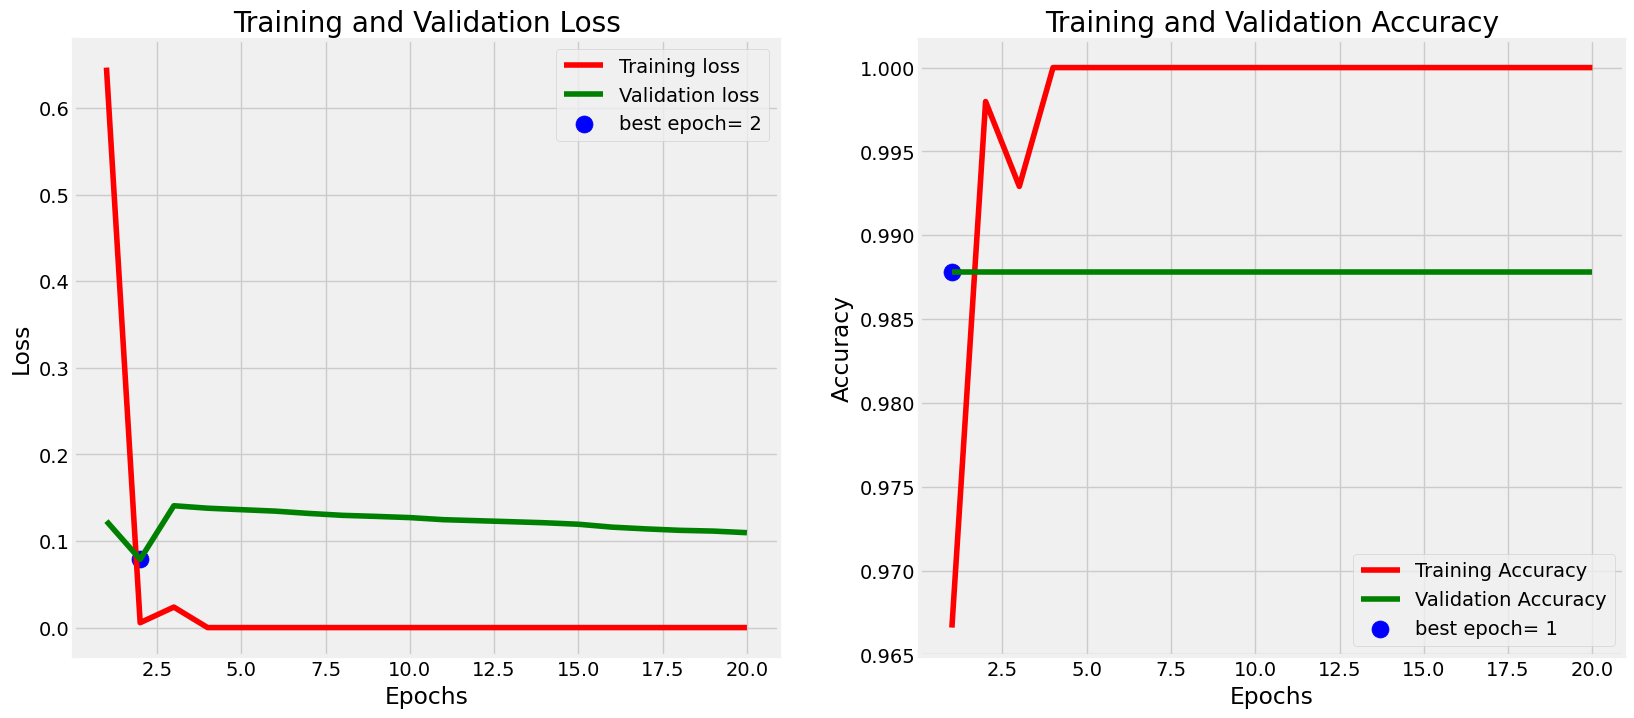

In [19]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [20]:
ts_length = len(test)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train, steps= test_steps, verbose= 1)
valid_score = model.evaluate(val, steps= test_steps, verbose= 1)
test_score = model.evaluate(test, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 3s 3s/step - loss: 0.0073 - accuracy: 1.0000
Train Loss:  0.0
Train Accuracy:  1.0
--------------------
Validation Loss:  0.0
Validation Accuracy:  1.0
--------------------
Test Loss:  0.007346693426370621
Test Accuracy:  1.0


In [21]:
# ! pip install -q kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [22]:
# ! kaggle datasets download -d tauilabdelilah/mrl-eye-dataset

In [23]:
# ! unzip mrl-eye-dataset.zip

In [24]:
test_new = tf.keras.utils.image_dataset_from_directory('/content/data/test', batch_size=4, image_size=(128,128), color_mode='grayscale')
test_new1 = tf.keras.utils.image_dataset_from_directory('/content/data/train', batch_size=4, image_size=(128,128), color_mode='grayscale', shuffle=True)

Found 3223 files belonging to 2 classes.
Found 81675 files belonging to 2 classes.


In [25]:
test_new

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
folder_path = '/content/data/train/open eyes'
folders = os.listdir(folder_path)
len(folders)

41295

In [27]:
imgs = []
for img in folders:
  img = cv2.imread(folder_path + img)
  img = cv2.resize(img, (128, 128))
  img=img/255
  imgs.append(img)

error: ignored

In [ ]:
len(imgs)

In [ ]:
predictions = model.predict(np.array(imgs))
predictions

In [ ]:
print(len(predictions))
print(len(predictions[0]))

In [ ]:
cnt = 0
for pred in predictions:
  if(pred[0] > pred[1]):
    cnt = cnt + 1

print(cnt)

In [ ]:
(len(predictions)-cnt)/len(predictions)